In [1]:
import pandas as pd

contents = pd.read_excel("contents.xlsx")
metrics = pd.read_excel("article_metrics_monthly.xlsx")
referrer = pd.read_excel("referrer.xlsx")
contents = contents.rename(columns={"post_id": "article_id"})

merged = pd.merge(contents, metrics, on="article_id", how="left")

merged = pd.merge(merged, referrer, on=["article_id", "period"], how="left")

cols_to_drop = ["date", "tag", "source_url","comments", "likes", "article_title"]
news_merged = merged.drop(columns=cols_to_drop, errors="ignore")  # 없는 컬럼이 있어도 에러 없이 진행

# 3️⃣ 결측치가 있는 행 모두 제거
news_merged = news_merged.dropna()
df = news_merged
news_merged.to_excel("news_merged.xlsx", index=False)

# 4️⃣ 결과 확인
print("남은 데이터 크기:", news_merged.shape)
print(news_merged.isna().sum())

남은 데이터 크기: (194799, 9)
article_id         0
category           0
title              0
content            0
period             0
views_total        0
referrer           0
referrer_detail    0
share              0
dtype: int64


In [11]:
# content 길이 계산

# 100자 미만 제거
df_filtered = df[df["content_len"] >= 100].copy()

# 가장 짧은 3개 출력
smallest3 = df_filtered.nsmallest(3, "content_len")

print(smallest3[["article_id", "title", "content_len"]])


print("총 content 개수:", len(df["content"]))
unique_content_count = df["content"].drop_duplicates().shape[0]
print("중복 제거 후 content 개수:", unique_content_count)
df["unique_content_count"] = df["content"].astype(str).str.len()

print(smallest3[["unique_content_count"]])
# 필요하면 content도 같이 보고 싶으면:
# print(smallest3[["article_id", "title", "content_len", "content"]])


         article_id                 title  content_len
49720  222655512017  [미디어 트렌드 용어] 디지털 치료제          100
49721  222655512017  [미디어 트렌드 용어] 디지털 치료제          100
49738  222655512017  [미디어 트렌드 용어] 디지털 치료제          100
총 content 개수: 194799
중복 제거 후 content 개수: 1701
       unique_content_count
49720                   100
49721                   100
49738                   100


📊 content 글자 길이 통계
count    194799.000000
mean       5888.529130
std        2002.532275
min           1.000000
25%        4723.000000
50%        5743.000000
75%        6829.000000
max       32074.000000
Name: content_len, dtype: float64


/home/u4005/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/u4005/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/u4005/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/u4005/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/u4005/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


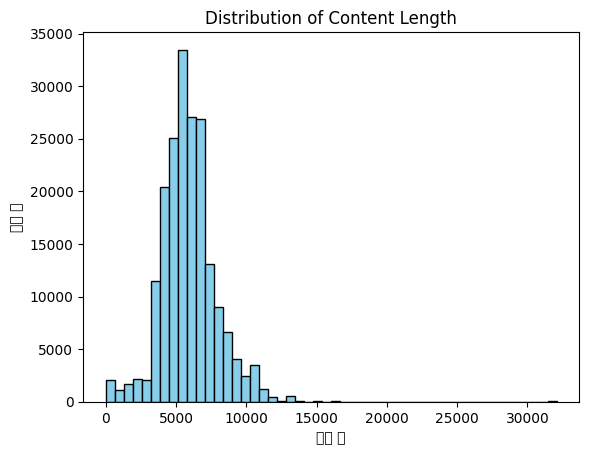

In [7]:
df["content_len"] = df["content"].astype(str).str.len()

print("📊 content 글자 길이 통계")
print(df["content_len"].describe())

# 히스토그램으로 시각화
import matplotlib.pyplot as plt
plt.hist(df["content_len"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Content Length")
plt.xlabel("글자 수")
plt.ylabel("기사 수")
plt.show()


In [10]:
merged.isna().sum()
news_merged.isna().sum()
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212698 entries, 0 to 212697
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   article_id       212698 non-null  int64  
 1   category         212592 non-null  object 
 2   title            212698 non-null  object 
 3   content          212592 non-null  object 
 4   date             212592 non-null  object 
 5   tag              171793 non-null  object 
 6   source_url       212698 non-null  object 
 7   period           212696 non-null  object 
 8   comments         212647 non-null  float64
 9   likes            212696 non-null  float64
 10  views_total      212696 non-null  float64
 11  article_title    194896 non-null  object 
 12  referrer         194896 non-null  object 
 13  referrer_detail  194896 non-null  object 
 14  share            194896 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 24.3+ MB


ref_table = news_merged["referrer"].value_counts().reset_index()
ref_table.columns = ["referrer", "count"]
ref_table


In [1]:
import pandas as pd

pd.set_option('display.max_rows', None)   # 행 전체 출력
pd.set_option('display.max_columns', None)  # 열 전체 출력
pd.set_option('display.width', None)     # 줄바꿈 없이 전체 표시
pd.set_option('display.max_colwidth', None)  # 긴 문자열도 잘리지 않게

# 데이터 로드
news_merged = pd.read_excel("news_merged.xlsx")

# referrer count
ref_table = news_merged["referrer"].value_counts().reset_index()
ref_table.columns = ["referrer", "count"]

print(ref_table)


                                    referrer  count
0                               네이버 통합검색_모바일  59621
1                                네이버 통합검색_PC  52581
2                                 네이버 블로그_PC  23976
3                                     Google  20056
4                                네이버 블로그_모바일   9254
5                              네이버 블로그검색_모바일   3820
6                                네이버 뷰검색_모바일   3365
7                               네이버 블로그검색_PC   3277
8                                         기타   2756
9                                 네이버 뷰검색_PC   2701
10                                      Bing   1189
11                                 네이버 메인_PC    940
12                               Daum 검색_모바일    693
13                                 네이버 검색_기타    691
14                              네이버 이미지검색_PC    609
15                                Daum 검색_PC    583
16                               chatgpt.com    581
17                         www.perplexity.ai    562
18          

In [6]:
import pandas as pd

# 1) 엑셀 파일 로드
df = pd.read_excel("news_merged.xlsx")   # 네 파일 이름에 맞게 변경

# 2) referrer 등장 횟수 계산
ref_counts = df["referrer"].value_counts()

# 3) 등장 횟수 ≥ 300인 referrer만 선택
valid_referrers = ref_counts[ref_counts >= 100].index.tolist()

print("남길 referrer 수:", len(valid_referrers))
print(valid_referrers[:20])  # 너무 많으면 앞 20개 확인

# 4) 해당 referrer만 데이터셋에 유지
filtered_df = df[df["referrer"].isin(valid_referrers)].copy()

print("필터링 후 데이터 크기:", filtered_df.shape)

# 5) 새로운 엑셀 파일로 저장
filtered_df.to_excel("news_merged_filtered_100.xlsx", index=False)

print("저장 완료: news_merged_filtered_2500.xlsx")


남길 referrer 수: 36
['네이버 통합검색_모바일', '네이버 통합검색_PC', '네이버 블로그_PC', 'Google', '네이버 블로그_모바일', '네이버 블로그검색_모바일', '네이버 뷰검색_모바일', '네이버 블로그검색_PC', '기타', '네이버 뷰검색_PC', 'Bing', '네이버 메인_PC', 'Daum 검색_모바일', '네이버 검색_기타', '네이버 이미지검색_PC', 'Daum 검색_PC', 'chatgpt.com', 'www.perplexity.ai', '다음 검색_모바일', '네이버 이미지검색_모바일']
필터링 후 데이터 크기: (191795, 9)
저장 완료: news_merged_filtered_2500.xlsx


In [ ]:
import pandas as pd

df = pd.read_excel("news_merged_filtered_100.xlsx")

def normalize_ref_final(ref):
    ref = str(ref).strip()


    # 1) 네이버 블로그만 분리
    if "네이버 블로그" in ref:
        return "네이버 블로그"

    # 2) 네이버 계열 전부 네이버로\
    if ref.startswith("네이버") or "naver" in ref.lower():
        return "네이버"

    # 3) Daum / 다음 계열 전부 Daum
    if "Daum" in ref or "다음" in ref:
        return "Daum"

    # 4) AI 검색엔진 계열
    if any(x in ref.lower() for x in ["chatgpt", "perplexity", "wrtn"]):
        return "AI 검색엔진"

    # 5) Google
    if "google" in ref.lower():
        return "Google"

    # 6) Bing / 야후 유지
    if "Bing" in ref or "야후" in ref:
        return ref  # 그대로 유지

    # 7) 기타 도메인 통합
    if any(ref.endswith(x) for x in [
        "stibee.com",
        "www.semyung.ac.kr",
        "cyber.inu.ac.kr",
        "kpfwi.kpf.or.kr"
    ]):
        return "기타"
    
    return ref



df["referrer_grouped"] = df["referrer"].apply(normalize_ref_final)

print(df["referrer_grouped"].value_counts().head(20))

# 통합 후 unique 개수
print("\n통합 전 unique referrers:", df["referrer"].nunique())
print("통합 후 unique referrers:", df["referrer_grouped"].nunique())

# 통합 후 데이터 저장
df.to_excel("news_merged_grouped_final.xlsx", index=False)
print("\n저장 완료: news_merged_grouped_final.xlsx")


=== 통합된 referrer top20 ===
referrer_grouped
네이버          122457
네이버 블로그       40327
Google        20056
기타             3669
Daum           2278
AI 검색엔진        1244
Bing           1189
Facebook        352
namu.wiki       123
야후              100
Name: count, dtype: int64

통합 전 unique referrers: 36
통합 후 unique referrers: 10

저장 완료: news_merged_grouped_final.xlsx


In [5]:
import pandas as pd

# 1) 엑셀 파일 읽기
df = pd.read_excel("news_merged_grouped_final.xlsx")

# 2) 기존 referrer 컬럼이 있다면 제거
df = df.drop(columns=["referrer"], errors="ignore")

print(df.columns)
# 3) referrer_grouped 컬럼이 존재하는지 체크
if "referrer_grouped" not in df.columns:
    raise ValueError("referrer_grouped 컬럼이 파일에 존재하지 않습니다.")

# 4) Facebook, namu.wiki, 야후 → '기타' 로 통합
df["referrer_grouped"] = df["referrer_grouped"].replace({
    "Facebook": "기타",
    "namu.wiki": "기타",
    "야후": "기타",
})

# 5) 컬럼명 referrer_grouped → referrer 로 변경
df = df.rename(columns={"referrer_grouped": "referrer"})

# 6) 저장
df.to_excel("news_merged_grouped_final.xlsx", index=False)

print("완료! 'referrer_grouped' → 'referrer'로 만들고 Facebook/namu/야후 → 기타 변환 완료.")


Index(['article_id', 'category', 'title', 'content', 'period', 'views_total',
       'referrer_detail', 'share', 'referrer_grouped'],
      dtype='object')
완료! 'referrer_grouped' → 'referrer'로 만들고 Facebook/namu/야후 → 기타 변환 완료.


In [ ]:
import pandas as pd
from transformers import LongformerTokenizerFast
from tqdm import tqdm

# ----------------------------
df_path = "news_merged_grouped_balanced.xlsx"
df = pd.read_excel(df_path)

print("데이터 로드 완료:", df.shape)

tokenizer = LongformerTokenizerFast.from_pretrained("allenai/longformer-base-4096")

token_counts = []

for text in tqdm(df["content"], desc="Tokenizing"):
    if not isinstance(text, str):
        text = ""  # 결측치 대비
    
    tokens = tokenizer.encode(
        text,
        truncation=False,    # 실제 전체 길이를 보고 싶으므로 truncation X
        add_special_tokens=True,
    )
    token_counts.append(len(tokens))

df["num_tokens"] = token_counts

avg_tokens = df["num_tokens"].mean()
print("평균 토큰 수:", avg_tokens)



/home/u4005/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


데이터 로드 완료: (83955, 9)


Tokenizing: 100%|██████████| 83955/83955 [09:51<00:00, 142.01it/s]

평균 토큰 수: 11631.494729319278


demographics pivot shape: (9932, 24)
demo_group            0-12_남  0-12_여  13-18_남   13-18_여   19-24_남   19-24_여  \
article_id   period                                                           
221763439722 2024-07     0.0     0.0      0.0  0.071443  0.000000  0.071443   
221766610231 2023-07     0.0     0.0      0.0  0.100000  0.000000  0.400000   
             2023-08     0.0     0.0      0.0  0.142843  0.142843  0.000000   
             2023-12     0.0     0.0      0.0  0.214279  0.071443  0.071443   
             2024-10     0.0     0.0      0.0  0.000000  0.000000  0.400000   

demo_group            25-29_남   25-29_여   30-34_남  30-34_여  ...  45-49_남  \
article_id   period                                         ...            
221763439722 2024-07      0.0  0.071443  0.142836      0.0  ...      0.0   
221766610231 2023-07      0.0  0.000000  0.000000      0.0  ...      0.0   
             2023-08      0.0  0.071446  0.071446      0.0  ...      0.0   
             2023-12      0.0

/home/u4005/.venv/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.draw()
/home/u4005/.venv/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.draw()
/home/u4005/.venv/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.draw()
/home/u4005/.venv/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.draw()
/home/u4005/.venv/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.draw()
/home/u4005/.venv/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from current font.
  fig.canvas.draw()
/home/u4

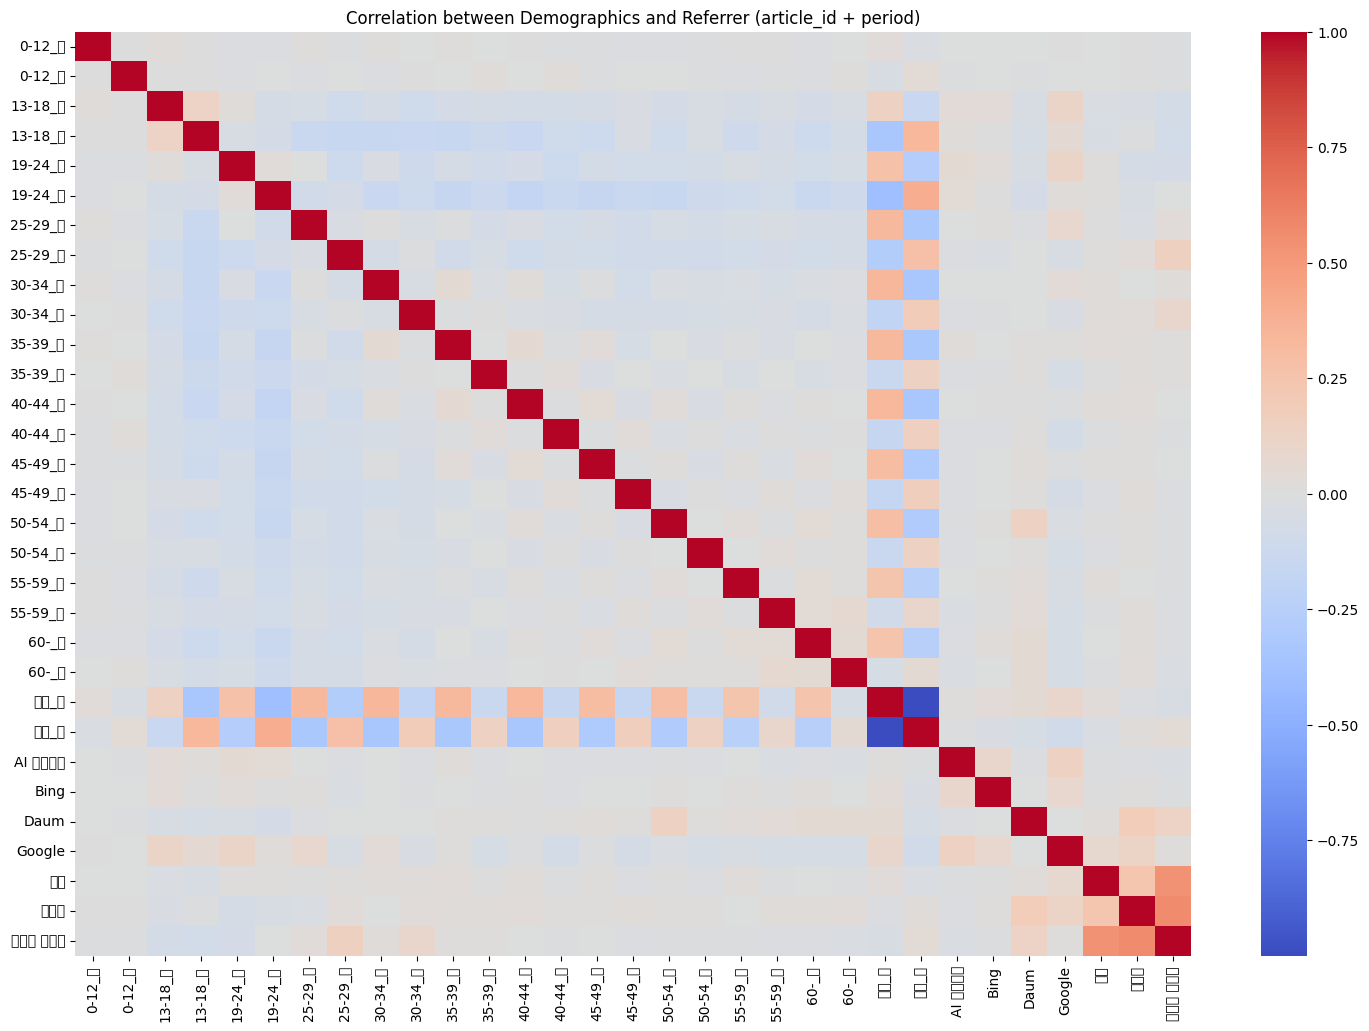

/home/u4005/.venv/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.draw()
/home/u4005/.venv/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from current font.
  fig.canvas.draw()
/home/u4005/.venv/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 50644 (\N{HANGUL SYLLABLE EN}) missing from current font.
  fig.canvas.draw()
/home/u4005/.venv/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.draw()
/home/u4005/.venv/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.draw()
/home/u4005/.venv/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.draw()
/home/u4005

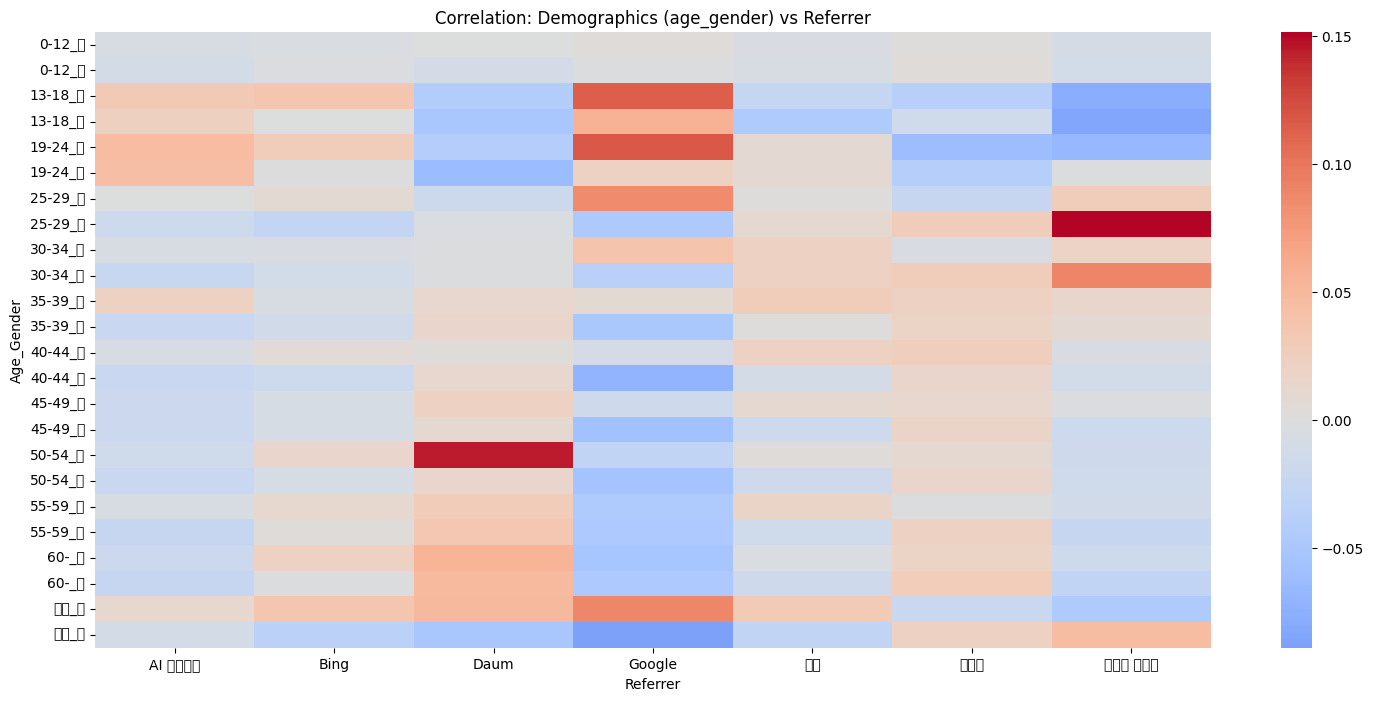

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) 메인 뉴스 + referrer 데이터
df_news = pd.read_excel("news_merged_grouped_final_summary.xlsx")

# 2) demographics 2개 합치기
df_demo1 = pd.read_excel("demographics_part001.xlsx")
df_demo2 = pd.read_excel("demographics_part002.xlsx")
df_demo = pd.concat([df_demo1, df_demo2], ignore_index=True)

# views, ratio 둘 다 0인 행 제거
df_demo = df_demo[~((df_demo["views"] == 0) & (df_demo["ratio"] == 0))].copy()

# ratio를 0~1 스케일로 변환 (이미 퍼센트라면)
df_demo["ratio_frac"] = df_demo["ratio"] / 100.0


# age_group + gender 조합으로 demo_group 만들기
df_demo["demo_group"] = df_demo["age_group"].astype(str) + "_" + df_demo["gender"].astype(str)

# article_id + period 단위로 그룹
demo_grouped = (
    df_demo
    .groupby(["article_id", "period", "demo_group"])["ratio_frac"]
    .sum()
    .reset_index()
)

# pivot: index = (article_id, period), columns = demo_group, values = ratio_frac
demo_pivot = demo_grouped.pivot_table(
    index=["article_id", "period"],
    columns="demo_group",
    values="ratio_frac",
    fill_value=0.0
)

# 각 article_id+period마다 합이 1이 되도록 다시 정규화 (혹시 합이 1이 안 되는 경우 대비)
demo_pivot = demo_pivot.div(demo_pivot.sum(axis=1).replace(0, 1), axis=0)

print("demographics pivot shape:", demo_pivot.shape)
print(demo_pivot.head())


df_ref = df_news.copy()

# share(%) → 실제 해당 유입경로에서 온 조회수 추정
df_ref["views_from_referrer"] = df_ref["views_total"] * (df_ref["share"] / 100.0)

# article_id + period + referrer 수준에서 합산 (혹시 중복 로우 있을 경우)
ref_grouped = (
    df_ref
    .groupby(["article_id", "period", "referrer"])["views_from_referrer"]
    .sum()
    .reset_index()
)

# pivot: index = (article_id, period), columns = referrer, values = views_from_referrer
ref_pivot = ref_grouped.pivot_table(
    index=["article_id", "period"],
    columns="referrer",
    values="views_from_referrer",
    fill_value=0.0
)

print("referrer pivot shape:", ref_pivot.shape)
print(ref_pivot.head())

# 인덱스를 맞추기 위해 둘 다 MultiIndex(article_id, period) 상태여야 함
# 위에서 pivot_table에서 이미 그렇게 만들었음.

df_joined = demo_pivot.join(ref_pivot, how="inner", lsuffix="_demo", rsuffix="_ref")

print("joined shape:", df_joined.shape)
print(df_joined.head())

# 전체 상관관계 행렬
corr = df_joined.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation between Demographics and Referrer (article_id + period)")
plt.show()


demo_cols = [c for c in df_joined.columns if "_" in c]  # 대충 10대_남, 20대_여 이런 컬럼들
ref_cols = [c for c in df_joined.columns if c not in demo_cols]  # 나머지를 referrer로 가정

corr_sub = df_joined[demo_cols + ref_cols].corr()

# demographics(행) x referrer(열)만 뽑기
corr_demo_ref = corr_sub.loc[demo_cols, ref_cols]

plt.figure(figsize=(18, 8))
sns.heatmap(corr_demo_ref, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation: Demographics (age_gender) vs Referrer")
plt.xlabel("Referrer")
plt.ylabel("Age_Gender")
plt.show()



In [ ]:
import pandas as pd

df = pd.read_excel("news_merged_grouped_final_summary.xlsx").copy()


# 1) NAVER-only / NAVER+BLOG-only 제거
naver_set = {"네이버", "네이버 블로그"}

# 각 (article_id, period) 그룹마다 referrer 집합 구하기
group_refset = df.groupby(["article_id", "period"])["referrer"].apply(lambda s: set(s.unique()))

# NAVER-only 그룹들 (세 가지 경우 모두 포함됨)
naver_only_groups = group_refset[group_refset.apply(lambda refs: refs.issubset(naver_set))].index

print("NAVER-only 제거될 그룹 수:", len(naver_only_groups))

# NAVER-only 제거한 df
df_no_naver_only = (
    df.set_index(["article_id", "period"])
      .drop(index=naver_only_groups, errors="ignore")
      .reset_index()
)

print("NAVER-only 제거 후 df 행수:", len(df_no_naver_only))


df2 = df_no_naver_only.copy()

# referrer별 조회수 추정치 계산
df2["views_ref"] = df2["views_total"] * (df2["share"] / 100.0)

# 그룹별 집계
group_views = (
    df2.groupby(["article_id", "period", "referrer"])["views_ref"]
       .sum()
       .reset_index()
)

# pivot 테이블 생성
pivot = group_views.pivot_table(
    index=["article_id", "period"],
    columns="referrer",
    values="views_ref",
    fill_value=0.0
)

# NAVER + NAVER BLOG 조회수 계산
for col in ["네이버", "네이버 블로그"]:
    if col not in pivot.columns:
        pivot[col] = 0.0

pivot["naver_total"] = pivot["네이버"] + pivot["네이버 블로그"]
pivot["total_views"] = pivot.sum(axis=1)
pivot["naver_ratio"] = pivot["naver_total"] / pivot["total_views"].replace(0, 1)

# threshold 적용
threshold = 0.7
good_groups = pivot[pivot["naver_ratio"] < threshold].index

print("NAVER dominance < 0.8 그룹 수:", len(good_groups))

# NAVER-only 제거 version에 good_groups 적용
df_final = (
    df_no_naver_only
        .set_index(["article_id", "period"])
        .loc[good_groups]
        .reset_index()
)

print("최종 df 행수:", len(df_final))
print("\n[최종 referrer 분포]")
print(df_final["referrer"].value_counts())


NAVER-only 제거될 그룹 수: 11179
NAVER-only 제거 후 df 행수: 139651
NAVER dominance < 0.8 그룹 수: 16288
최종 df 행수: 139651

[최종 referrer 분포]
referrer
네이버        82907
네이버 블로그    27733
Google     20056
기타          4244
Daum        2278
AI 검색엔진     1244
Bing        1189
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# =============================
# 1. 데이터 로드
# =============================
contents = pd.read_excel("contents.xlsx")
metrics = pd.read_excel("article_metrics_monthly.xlsx")
referrer = pd.read_excel("referrer.xlsx")
demo1 = pd.read_excel("demographics_part001.xlsx")
demo2 = pd.read_excel("demographics_part002.xlsx")

demographics = pd.concat([demo1, demo2])

# =============================
# 2. metrics 기준으로 통합 시작 (가볍게)
# =============================
df = metrics.copy()

# contents merge → 제목, 본문, 태그 등
df = df.merge(contents, on="article_id", how="left")

print("▶ 기본 df shape (metrics + contents):", df.shape)

# =============================
# 3. Feature Engineering
# =============================

# --- 3-1. 텍스트 길이 기반 feature ---
df["content_length"] = df["content"].fillna("").apply(len)
df["title_length"] = df["title"].fillna("").apply(len)
df["num_tags"] = df["tag"].fillna("").apply(lambda x: len(str(x).split(",")))

# --- 3-2. referrer share (플랫폼별 pivot) ---
ref_pivot = (
    referrer
    .pivot_table(
        index=["article_id", "period"],
        columns="referrer",
        values="share",
        aggfunc="sum",
    )
    .fillna(0)
    .add_prefix("ref_")
)

print("▶ ref_pivot shape:", ref_pivot.shape)

df = df.merge(ref_pivot, on=["article_id", "period"], how="left")

# --- 3-3. demographics pivot (연령/성별) ---
demo_pivot = (
    demographics
    .pivot_table(
        index=["article_id", "period"],
        columns=["age_group", "gender"],
        values="ratio",
        aggfunc="sum",
    )
    .fillna(0)
)

demo_pivot.columns = [f"demo_{age}_{gender}" for age, gender in demo_pivot.columns]

print("▶ demo_pivot shape:", demo_pivot.shape)

df = df.merge(demo_pivot, on=["article_id", "period"], how="left")

print("▶ 최종 df shape (merge 후):", df.shape)

# 4. 수치형 feature만 선택해서 상관계수 계산
numeric_df = df.select_dtypes(include=[np.number])
print("▶ numeric_df shape:", numeric_df.shape)

if "views_total" not in numeric_df.columns:
    raise ValueError("'views_total' 컬럼이 numeric_df에 없습니다. dtype이나 컬럼명을 확인하세요.")

# OPTIONAL: float32로 다운캐스팅해서 메모리 조금 더 줄이기
numeric_df = numeric_df.astype(np.float32)

target = numeric_df["views_total"]
features = numeric_df.drop(columns=["views_total"])

# views_total과의 상관계수만 계산 (전체 corr 매트릭스 X)
correlations = features.corrwith(target).sort_values(ascending=False)


print("\n===== 📌 조회수와 가장 관련 있는 feature TOP 30 =====\n")
print(correlations.head(30))

print("\n===== 📌 조회수와 가장 반비례하는 feature TOP 30 =====\n")
print(correlations.tail(30))

# =============================
# referrer 기반 feature만 따로 상관계수 계산
# =============================
ref_cols = [c for c in numeric_df.columns if c.startswith("ref_")]

ref_df = numeric_df[ref_cols + ["views_total"]]   # referrer + 조회수만 선택

ref_corr = ref_df.drop(columns=["views_total"]).corrwith(ref_df["views_total"]).sort_values(ascending=False)

print("\n===== 📌 조회수와 상관 높은 referrer TOP 20 =====\n")
print(ref_corr.head(20))

print("\n===== 📌 조회수와 반비례하는 referrer TOP 20 =====\n")
print(ref_corr.tail(20))



▶ 기본 df shape (metrics + contents): (45344, 11)
▶ ref_pivot shape: (27576, 419)
▶ demo_pivot shape: (45396, 24)
▶ 최종 df shape (merge 후): (45344, 457)
▶ numeric_df shape: (45344, 450)

===== 📌 조회수와 가장 관련 있는 feature TOP 30 =====

likes                           0.567406
ref_기타                          0.515161
demo_전체_여                       0.422556
demo_전체_남                       0.403145
ref_네이버 메인_PC                   0.401954
comments                        0.373627
demo_25-29_여                    0.293627
demo_19-24_여                    0.277755
demo_30-34_여                    0.242833
demo_25-29_남                    0.235679
demo_30-34_남                    0.231070
demo_35-39_남                    0.225636
demo_40-44_남                    0.221387
demo_35-39_여                    0.198218
demo_45-49_남                    0.196548
demo_13-18_여                    0.194982
demo_19-24_남                    0.191756
demo_40-44_여                    0.191487
demo_45-49_여                    0.

In [2]:
import pandas as pd
import numpy as np

# =============================
# 1. 데이터 로드
# =============================
summary = pd.read_excel("news_merged_grouped_final_summary.xlsx")
metrics = pd.read_excel("article_metrics_monthly.xlsx")
demo1 = pd.read_excel("demographics_part001.xlsx")
demo2 = pd.read_excel("demographics_part002.xlsx")
demographics = pd.concat([demo1, demo2])

print("summary shape:", summary.shape)
print("metrics shape:", metrics.shape)
print("demo shape:", demographics.shape)

# =============================
# 2. summary + metrics merge
# =============================
metrics_small = metrics[["article_id", "period", "comments", "likes"]]
df = summary.merge(metrics_small, on=["article_id", "period"], how="left")

print("summary+metrics df shape:", df.shape)
print("컬럼:", df.columns.tolist())

# -----------------------------
# 3) NAVER-only / NAVER+BLOG-only 제거
# -----------------------------
naver_set = {"네이버", "네이버 블로그"}

group_refset = df.groupby(["article_id", "period"])["referrer"] \
                 .apply(lambda s: set(s.dropna().unique()))

naver_only_groups = group_refset[group_refset.apply(lambda refs: refs.issubset(naver_set))].index
print("NAVER-only 제거될 (article_id, period) 그룹 수:", len(naver_only_groups))

df_final = (
    df.set_index(["article_id", "period"])
      .drop(index=naver_only_groups, errors="ignore")
      .reset_index()
)

print("NAVER-only 제거 후 df_final 행수:", len(df_final))

# =====================================
# ★ category 원-핫 인코딩 (df_final 기준, 한 번만!)
# =====================================
if "category" in df_final.columns:
    print("[INFO] category unique:", df_final["category"].unique()[:20])
    df_final = pd.get_dummies(df_final, columns=["category"], prefix="cat", dummy_na=True)
    print("[INFO] category one-hot added. df_final:", df_final.shape)
else:
    print("[경고] df_final 에 category 컬럼 없음")

# ================================================================
# 4. referrer pivot 생성 (ref_XXX 피처)
# ================================================================
# referrer별 조회수 추정치: views_total × share(%)
df_final["views_ref"] = df_final["views_total"] * (df_final["share"] / 100.0)

ref_pivot = df_final.pivot_table(
    index=["article_id", "period"],
    columns="referrer",
    values="views_ref",
    aggfunc="sum",
    fill_value=0.0
).add_prefix("ref_").reset_index()

print("ref_pivot shape:", ref_pivot.shape)

demo_pivot = demographics.pivot_table(
    index=["article_id", "period"],
    columns=["age_group", "gender"],
    values="ratio",
    aggfunc="sum",
    fill_value=0.0
)
demo_pivot.columns = [f"demo_{age}_{gender}" for age, gender in demo_pivot.columns]
demo_pivot = demo_pivot.reset_index()

print("demo_pivot shape:", demo_pivot.shape)

df_merged = (
    df_final.merge(ref_pivot, on=["article_id", "period"], how="left")
            .merge(demo_pivot, on=["article_id", "period"], how="left")
)

print("최종 df_merged shape:", df_merged.shape)

if "tag" in df_merged.columns:
    all_tags = set()
    for tags in df_merged["tag"].dropna():
        for t in str(tags).split(","):
            all_tags.add(t.strip())
    all_tags = list(all_tags)

    print("[tag] total tags:", len(all_tags))

    for t in all_tags:
        df_merged[f"tag_{t}"] = df_merged["tag"].apply(
            lambda x: 1 if isinstance(x, str) and t in x.split(",") else 0
        )

print("최종 df_merged shape (with tags):", df_merged.shape)

cat_dummy_cols = [c for c in df_merged.columns if c.startswith("cat_")]
tag_dummy_cols = [c for c in df_merged.columns if c.startswith("tag_")]

print("Category dummy feature 수:", len(cat_dummy_cols))
print("Tag dummy feature 수:", len(tag_dummy_cols))

# 숫자형으로 강제 변환 (실패하면 NaN → 0)
for col in cat_dummy_cols + tag_dummy_cols:
    df_merged[col] = pd.to_numeric(df_merged[col], errors="coerce").fillna(0)

# (2) 숫자형 컬럼만 따로 떼기
numeric_df = df_merged.select_dtypes(include=[np.number]).copy()
print("numeric_df shape:", numeric_df.shape)

# referrer 피처들만 추출
ref_cols = [c for c in numeric_df.columns if c.startswith("ref_")]
print("Referrer feature 수:", len(ref_cols))

# pandas 출력 옵션 (FULL)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

# (3) Referrer 하나씩 전체 numeric feature와 상관계수 계산
all_corr_results = {}
for ref in ref_cols:
    corr_series = numeric_df.corrwith(numeric_df[ref])  # ref vs 전체 numeric feature
    all_corr_results[ref] = corr_series

ref_corr_matrix = pd.DataFrame(all_corr_results).T  # (referrer 행, feature 열)

print("\n===== 📌 Referrer × 모든 Numeric Feature 상관계수 (FULL 출력) =====\n")
print(ref_corr_matrix)

# ------------------------------------------------
# 🔹 Referrer × Category(one-hot) 상관계수만 따로 계산해서 보기
# ------------------------------------------------
cat_dummy_cols = [c for c in df_merged.columns if c.startswith("cat_")]
print("\n[DEBUG] df_merged cat_ cols:", cat_dummy_cols)

if cat_dummy_cols and ref_cols:
    # 카테고리 더미/리퍼러 컬럼 숫자형으로 맞추기
    df_cat = df_merged[cat_dummy_cols].apply(pd.to_numeric, errors="coerce").fillna(0)
    df_ref = df_merged[ref_cols].apply(pd.to_numeric, errors="coerce").fillna(0)

    # referrer(행) × category(열) 상관계수 행렬
    ref_cat_corr = pd.DataFrame(index=ref_cols, columns=cat_dummy_cols, dtype=float)

    for ref in ref_cols:
        for cat in cat_dummy_cols:
            # 표준편차가 0이면 corr가 NaN이 되므로 방어 코드
            if df_ref[ref].std() == 0 or df_cat[cat].std() == 0:
                ref_cat_corr.loc[ref, cat] = np.nan
            else:
                ref_cat_corr.loc[ref, cat] = df_ref[ref].corr(df_cat[cat])

    print("\n===== 🎯 Referrer × Category(one-hot) 상관계수 =====\n")
    print(ref_cat_corr)
else:
    print("\n[경고] df_merged 에 cat_ 더미 컬럼이 없거나 ref_ 컬럼이 없습니다.")

|
tag_dummy_cols = [c for c in df_merged.columns if c.startswith("tag_")]
print("\n[DEBUG] df_merged tag_ cols:", tag_dummy_cols)

if tag_dummy_cols and ref_cols:
    df_tag = df_merged[tag_dummy_cols].apply(pd.to_numeric, errors="coerce").fillna(0)
    df_ref = df_merged[ref_cols].apply(pd.to_numeric, errors="coerce").fillna(0)

    ref_tag_corr = pd.DataFrame(index=ref_cols, columns=tag_dummy_cols, dtype=float)

    for ref in ref_cols:
        for tag in tag_dummy_cols:
            if df_ref[ref].std() == 0 or df_tag[tag].std() == 0:
                ref_tag_corr.loc[ref, tag] = np.nan
            else:
                ref_tag_corr.loc[ref, tag] = df_ref[ref].corr(df_tag[tag])

    print("\n===== 🏷 Referrer × Tag(one-hot) 상관계수 =====\n")
    print(ref_tag_corr)
else:
    print("\n[INFO] tag_ 더미 컬럼이 없거나 ref_ 컬럼이 없습니다.")



SyntaxError: invalid syntax (629934196.py, line 168)